A paragraph is a series of sentences that are organized and coherent, and are all related to a single topic. Almost every piece of writing you do that is longer than a few sentences should be organized into paragraphs. This is because paragraphs show a reader where the subdivisions of an essay begin and end, and thus help the reader see the organization of the essay and grasp its main points.
Paragraphs can contain many different kinds of information. A paragraph could contain a series of brief examples or a single long illustration of a general point. It might describe a place, character, or process; narrate a series of events; compare or contrast two or more things; classify items into categories; or describe causes and effects. Regardless of the kind of information they contain, all paragraphs share certain characteristics. One of the most important of these is a topic sentence.
1.	Convert the above paragraph into vectors using:i)	Word2vec
ii)	USE
iii)	ELMO
iv)	GP2
v)	Sentence-BERT


In [ ]:
paragraph='''A paragraph is a series of sentences that are organized and coherent, and are all related to a single topic. Almost every piece of writing you do that is longer than a few sentences should be organized into paragraphs. This is because paragraphs show a reader where the subdivisions of an essay begin and end, and thus help the reader see the organization of the essay and grasp its main points.
Paragraphs can contain many different kinds of information. A paragraph could contain a series of brief examples or a single long illustration of a general point. It might describe a place, character, or process; narrate a series of events; compare or contrast two or more things; classify items into categories; or describe causes and effects. Regardless of the kind of information they contain, all paragraphs share certain characteristics. One of the most important of these is a topic sentence.'''

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import numpy as np
import gensim
from gensim.models import Word2Vec
from gensim import corpora,models,similarities

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


word2vec

In [ ]:
def essay_to_sentences(para):
    tokenizer=nltk.data.load('tokenizers/punkt/english.pickle')
    raw_sentences=tokenizer.tokenize(para.strip())
    sentences=[]
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append((raw_sentence))
    return sentences
sentences= essay_to_sentences(paragraph)


wordvecs=[nltk.word_tokenize(sent) for sent in sentences]
stops=list(set(stopwords.words("english")))

for i in wordvecs:
  for j in i:
    if j in stops:
      i.remove(j)
    elif len(j)==1:
      i.remove(j)

model=gensim.models.Word2Vec(wordvecs,min_count=1,size=32)
model['paragraph']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


array([ 0.00778762,  0.01204301,  0.00991048, -0.00509115,  0.01378211,
       -0.00451053, -0.0060953 , -0.00438694, -0.01559457,  0.01003721,
        0.0132491 , -0.01326717, -0.01250992,  0.0011908 , -0.00168712,
       -0.01364463,  0.01152416,  0.00328791, -0.01207458, -0.00011364,
        0.00246571,  0.0140457 , -0.00107529,  0.01439384,  0.00587748,
        0.00350567,  0.00235062,  0.0027146 , -0.0153346 ,  0.01351293,
        0.01189841, -0.01555324], dtype=float32)

In [ ]:
model.most_similar('sentence')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('series', 0.3638501763343811),
 ('is', 0.2946968674659729),
 ('the', 0.2542320489883423),
 ('examples', 0.24452349543571472),
 ('paragraphs', 0.24359798431396484),
 ('essay', 0.20885828137397766),
 ('kinds', 0.20520144701004028),
 ('or', 0.18503132462501526),
 ('every', 0.18367376923561096),
 ('are', 0.1665898710489273)]

In [ ]:
import tensorflow_hub as hub
use= hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embeddings=use(sentences)
print(embeddings)

print("shape= ",embeddings[0].shape)
print("The sentence: ",sentences[0],"\n is converted as : \n{}".format(embeddings[0]))

INFO:absl:Using /tmp/tfhub_modules to cache modules.
INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder/4'.
INFO:absl:Downloaded https://tfhub.dev/google/universal-sentence-encoder/4, Total size: 987.47MB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder/4'.


tf.Tensor(
[[ 0.01168496 -0.0306057   0.06116336 ... -0.08641754  0.00025049
   0.0548275 ]
 [ 0.02972507 -0.03655472  0.08002592 ... -0.07038905 -0.02832128
   0.04804675]
 [ 0.07221662 -0.04182234  0.05336688 ... -0.06942354  0.01795933
   0.06641506]
 ...
 [ 0.01586951 -0.05243038  0.06065089 ... -0.06435592  0.04215745
   0.06304207]
 [ 0.04141247  0.0258891  -0.00625629 ... -0.0216299   0.00910816
   0.03623573]
 [ 0.0157841  -0.02142678  0.00402447 ... -0.09605584 -0.06707881
   0.0797038 ]], shape=(8, 512), dtype=float32)
shape=  (512,)
The sentence:  A paragraph is a series of sentences that are organized and coherent, and are all related to a single topic. 
 is converted as : 
[ 1.16849560e-02 -3.06057017e-02  6.11633621e-02  8.47723708e-02
 -5.83404489e-03  2.84163468e-03  2.59479191e-02  3.90258408e-03
 -5.55585772e-02  5.68110794e-02 -8.95015243e-03 -4.50466387e-03
 -6.06310442e-02  3.18566710e-02 -6.86047748e-02 -9.39451531e-02
 -4.23613824e-02  3.93056907e-02 -9.02280435e

In [ ]:
bert = hub.KerasLayer("https://tfhub.dev/google/nnlm-en-dim128/2")
embeddings2=bert(sentences)
print("shape=",embeddings2[0].shape)
print("The sentence: ",sentences[0],"\n is converted as : \n{}".format(embeddings2[0]))

shape= (128,)
The sentence:  A paragraph is a series of sentences that are organized and coherent, and are all related to a single topic. 
 is converted as : 
[ 0.58439595  0.03570241  0.07089429  0.07733776 -0.01214658 -0.12435579
 -0.07824828 -0.00274544 -0.17964575  0.21627969  0.03844824 -0.19277166
 -0.12646586  0.02667335 -0.13363229 -0.00374018 -0.06618838  0.00353754
 -0.21084203  0.18731229  0.06417363  0.03025784  0.01986333 -0.08417947
  0.03461034 -0.10283548 -0.0499575  -0.07064839 -0.04805086  0.01945524
 -0.00223823 -0.05097701 -0.06611909 -0.20404741  0.0077603  -0.030263
  0.045775   -0.12902436 -0.01877959  0.01619794  0.11104539 -0.08053494
  0.23449406 -0.0133885  -0.07351163  0.15601118  0.01348254 -0.12100593
 -0.0793598  -0.02779575  0.01043605 -0.05894459  0.05691529  0.06368439
  0.0845022   0.00101441  0.09372724 -0.0798301   0.05913398 -0.1558554
 -0.10184948 -0.02461847 -0.02784929 -0.08858608  0.03941965 -0.16783947
 -0.14578974 -0.02660521  0.14279118 -0.0

In [ ]:
import tensorflow_hub as hub
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

elmo=hub.Module("https://tfhub.dev/google/elmo/3",trainable=True)
embeddings=elmo(
    sentences,
    signature="default",
    as_dict=True)["elmo"]
init=tf.initialize_all_variables()
sess=tf.Session()
sess.run(init)
print("\n\n")
print(sess.run(embeddings[0]))
print("shape=",embeddings[0].shape)

INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/google/elmo/3'.
INFO:absl:Downloaded https://tfhub.dev/google/elmo/3, Total size: 357.40MB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/google/elmo/3'.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.





[[ 0.29286996 -0.14378002 -0.32574052 ... -0.39559275 -0.35758832
  -0.03588067]
 [-0.59441644  0.09640661  0.50537676 ...  0.22031897  0.26976916
   0.46307242]
 [-0.17083307 -0.18744141 -0.27626717 ... -0.6755089   0.25390008
   0.654027  ]
 ...
 [-0.02840841 -0.04353216  0.04130163 ...  0.02583168 -0.01429836
  -0.01650422]
 [-0.02840841 -0.04353216  0.04130163 ...  0.02583168 -0.01429836
  -0.01650422]
 [-0.02840841 -0.04353216  0.04130163 ...  0.02583168 -0.01429836
  -0.01650422]]
shape= (32, 1024)


In [ ]:
import torch
!pip install -U sentence-transformers
import transformers
gptokenizer=transformers.GPT2Tokenizer.from_pretrained('gpt2-large')
model=transformers.GPT2LMHeadModel.from_pretrained('gpt2-large')
output=gptokenizer.encode(paragraph ,add_special_tokens=False,return_tensors="pt")
print("shape=",output.shape)
output

shape= torch.Size([1, 172])


tensor([[   32,  7322,   318,   257,  2168,   286, 13439,   326,   389,  8389,
           290, 24870,    11,   290,   389,   477,  3519,   284,   257,  2060,
          7243,    13, 16699,   790,  3704,   286,  3597,   345,   466,   326,
           318,  2392,   621,   257,  1178, 13439,   815,   307,  8389,   656,
         23549,    13,   770,   318,   780, 23549,   905,   257,  9173,   810,
           262, 45944,  3279,   286,   281, 14268,  2221,   290,   886,    11,
           290,  4145,  1037,   262,  9173,   766,   262,  4009,   286,   262,
         14268,   290, 13180,   663,  1388,  2173,    13,   198, 10044,  6111,
            82,   460,  3994,   867,  1180,  6982,   286,  1321,    13,   317,
          7322,   714,  3994,   257,  2168,   286,  4506,  6096,   393,   257,
          2060,   890, 20936,   286,   257,  2276,   966,    13,   632,  1244,
          6901,   257,  1295,    11,  2095,    11,   393,  1429,    26,  6664,
           378,   257,  2168,   286,  2995,    26,  

In [ ]:
import torch
import transformers
gptokenizer=transformers.GPT2Tokenizer.from_pretrained('gpt2-large')
model=transformers.GPT2LMHeadModel.from_pretrained('gpt2-large')
output=gptokenizer.encode(paragraph ,add_special_tokens=False,return_tensors="pt")
print("shape=",output.shape)
output

shape= torch.Size([1, 172])


tensor([[   32,  7322,   318,   257,  2168,   286, 13439,   326,   389,  8389,
           290, 24870,    11,   290,   389,   477,  3519,   284,   257,  2060,
          7243,    13, 16699,   790,  3704,   286,  3597,   345,   466,   326,
           318,  2392,   621,   257,  1178, 13439,   815,   307,  8389,   656,
         23549,    13,   770,   318,   780, 23549,   905,   257,  9173,   810,
           262, 45944,  3279,   286,   281, 14268,  2221,   290,   886,    11,
           290,  4145,  1037,   262,  9173,   766,   262,  4009,   286,   262,
         14268,   290, 13180,   663,  1388,  2173,    13,   198, 10044,  6111,
            82,   460,  3994,   867,  1180,  6982,   286,  1321,    13,   317,
          7322,   714,  3994,   257,  2168,   286,  4506,  6096,   393,   257,
          2060,   890, 20936,   286,   257,  2276,   966,    13,   632,  1244,
          6901,   257,  1295,    11,  2095,    11,   393,  1429,    26,  6664,
           378,   257,  2168,   286,  2995,    26,  

2). Find named entities (NER) for the above paragraph?

In [ ]:
import spacy
from spacy import displacy
ner=spacy.load('en')
result=ner(paragraph)

for word in result.ents:
  print(word.text,word.label_)

spacy.explain('GPE')
displacy.render(result,style="ent",jupyter=True)
resultss=ner("The doctor is a person who looks after the sick people and prescribes medicines so that the patient recovers fast. In order to become a doctor, a person has to study medicine. Doctors lead a hard life. Their life is very busy. They get up early in the morning and go to the hospital. They work without taking a break. They always remain polite so that patients feel comfortable with them. Since doctors work so hard we must realise their value.")
for word in resultss.ents:
  print(word.text,word.label_)

displacy.render(resultss,style="ent",jupyter=True)

two CARDINAL
One CARDINAL


early in the morning TIME


3). Find similar sentences(repeated sentences) from the above paragraph?

In [ ]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')
se_embeddings = sbert_model.encode(sentences)
q1_vec= sbert_model.encode(sentences[0])

def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

for sent in sentences:
  sim = cosine(q1_vec, sbert_model.encode([sent])[0])

  if sim>0.6:
    print("Sentence1 =",sentences[0],"\n \nSentence2=", sent, "\n\nsimilarity = ", sim,end="\n ----------------------------- \n")


Sentence1 = A paragraph is a series of sentences that are organized and coherent, and are all related to a single topic. 
 
Sentence2= A paragraph is a series of sentences that are organized and coherent, and are all related to a single topic. 

similarity =  1.0
 ----------------------------- 
Sentence1 = A paragraph is a series of sentences that are organized and coherent, and are all related to a single topic. 
 
Sentence2= Almost every piece of writing you do that is longer than a few sentences should be organized into paragraphs. 

similarity =  0.64775366
 ----------------------------- 
Sentence1 = A paragraph is a series of sentences that are organized and coherent, and are all related to a single topic. 
 
Sentence2= A paragraph could contain a series of brief examples or a single long illustration of a general point. 

similarity =  0.6927288
 ----------------------------- 
Sentence1 = A paragraph is a series of sentences that are organized and coherent, and are all related to

4). Explain POS tagging with HMM?

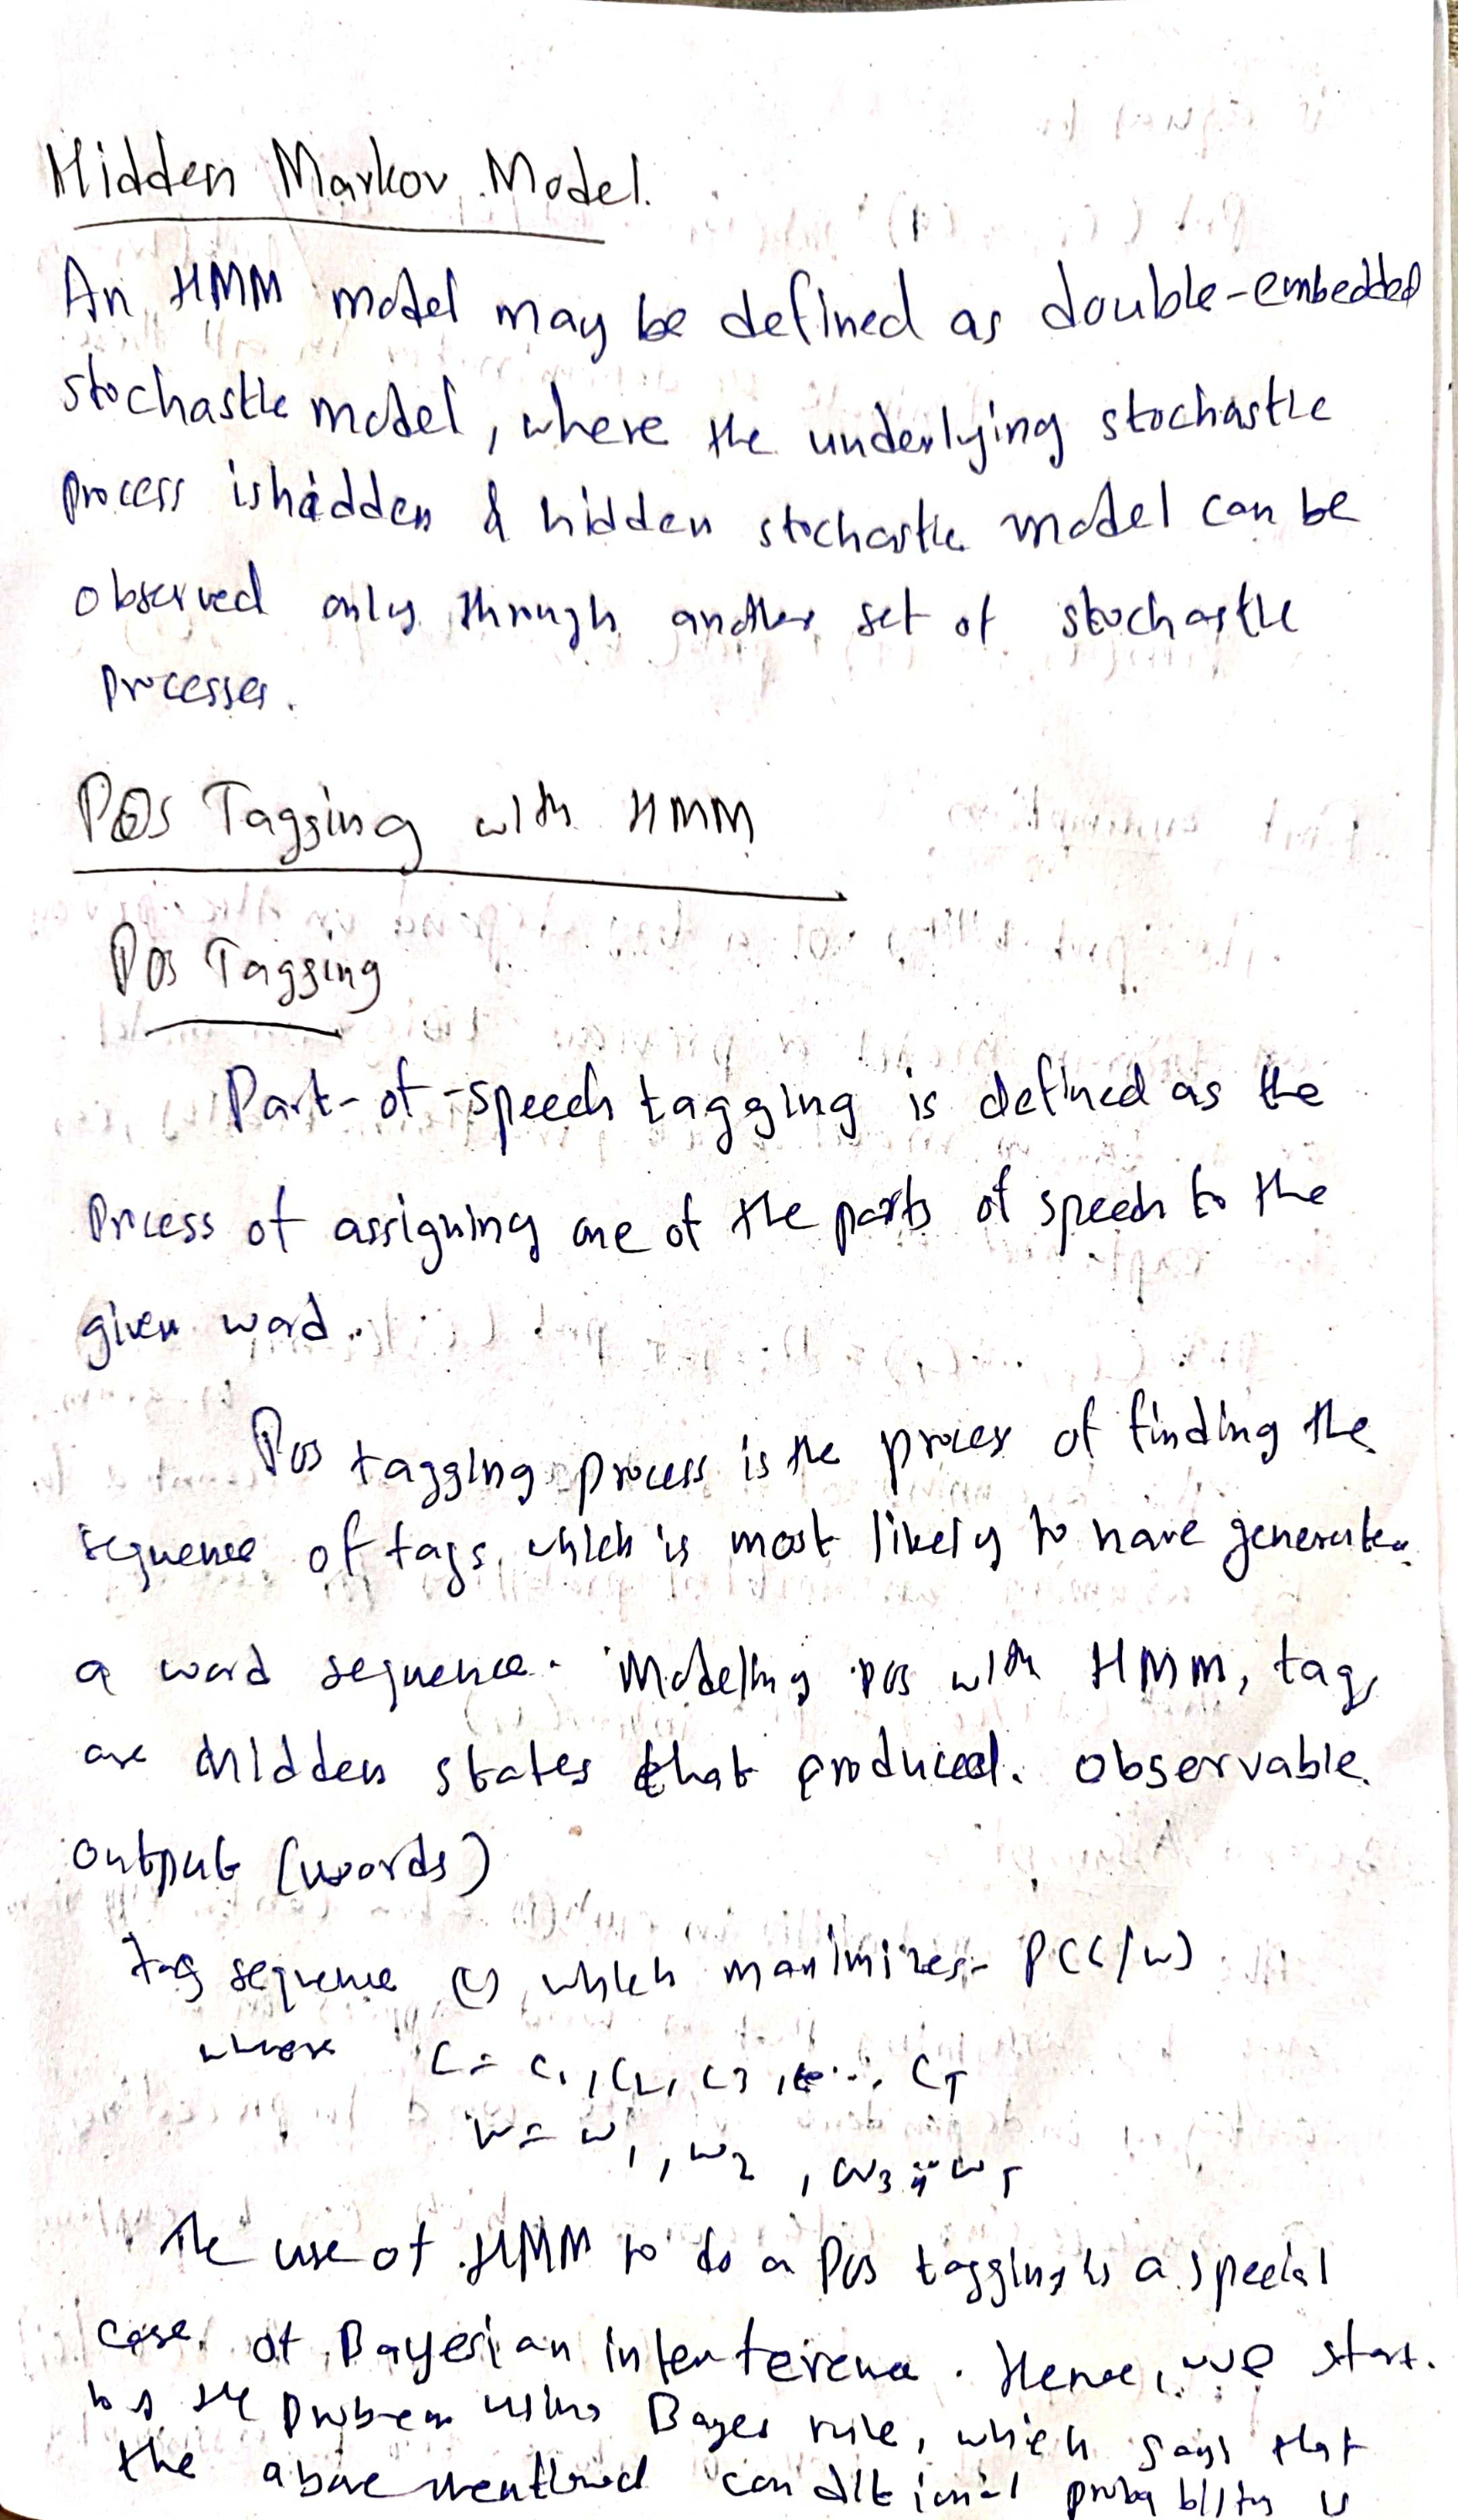

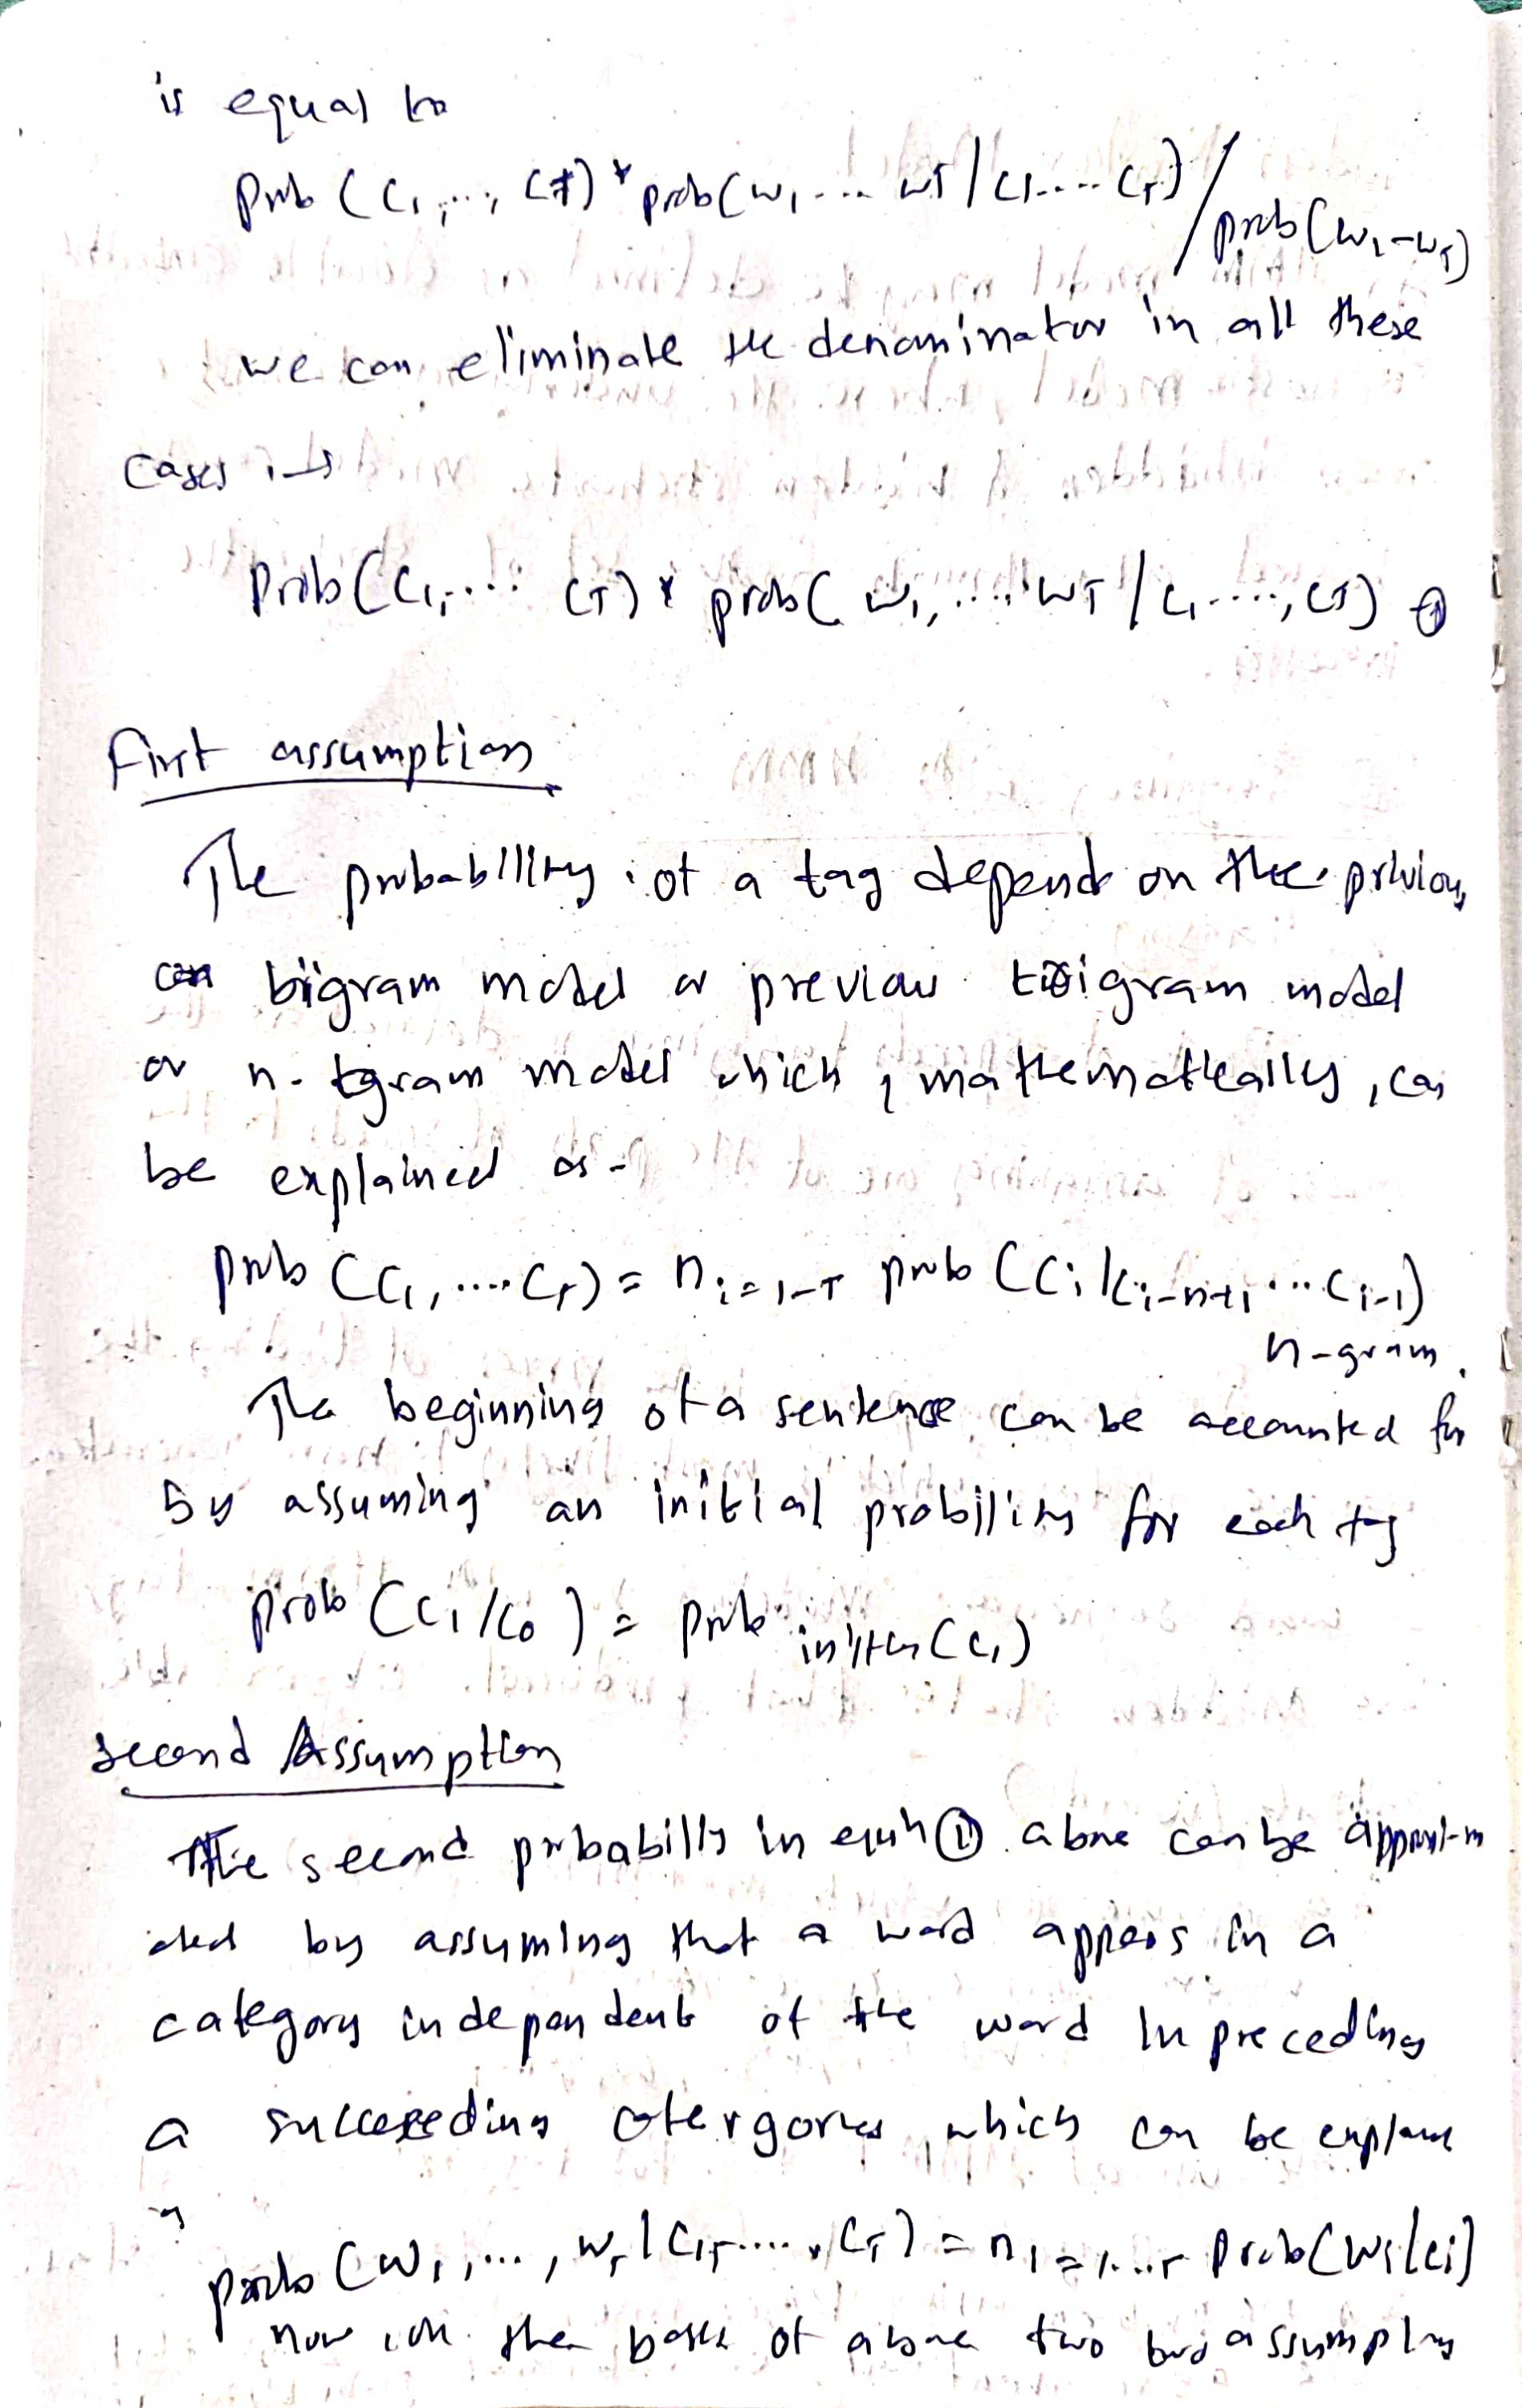

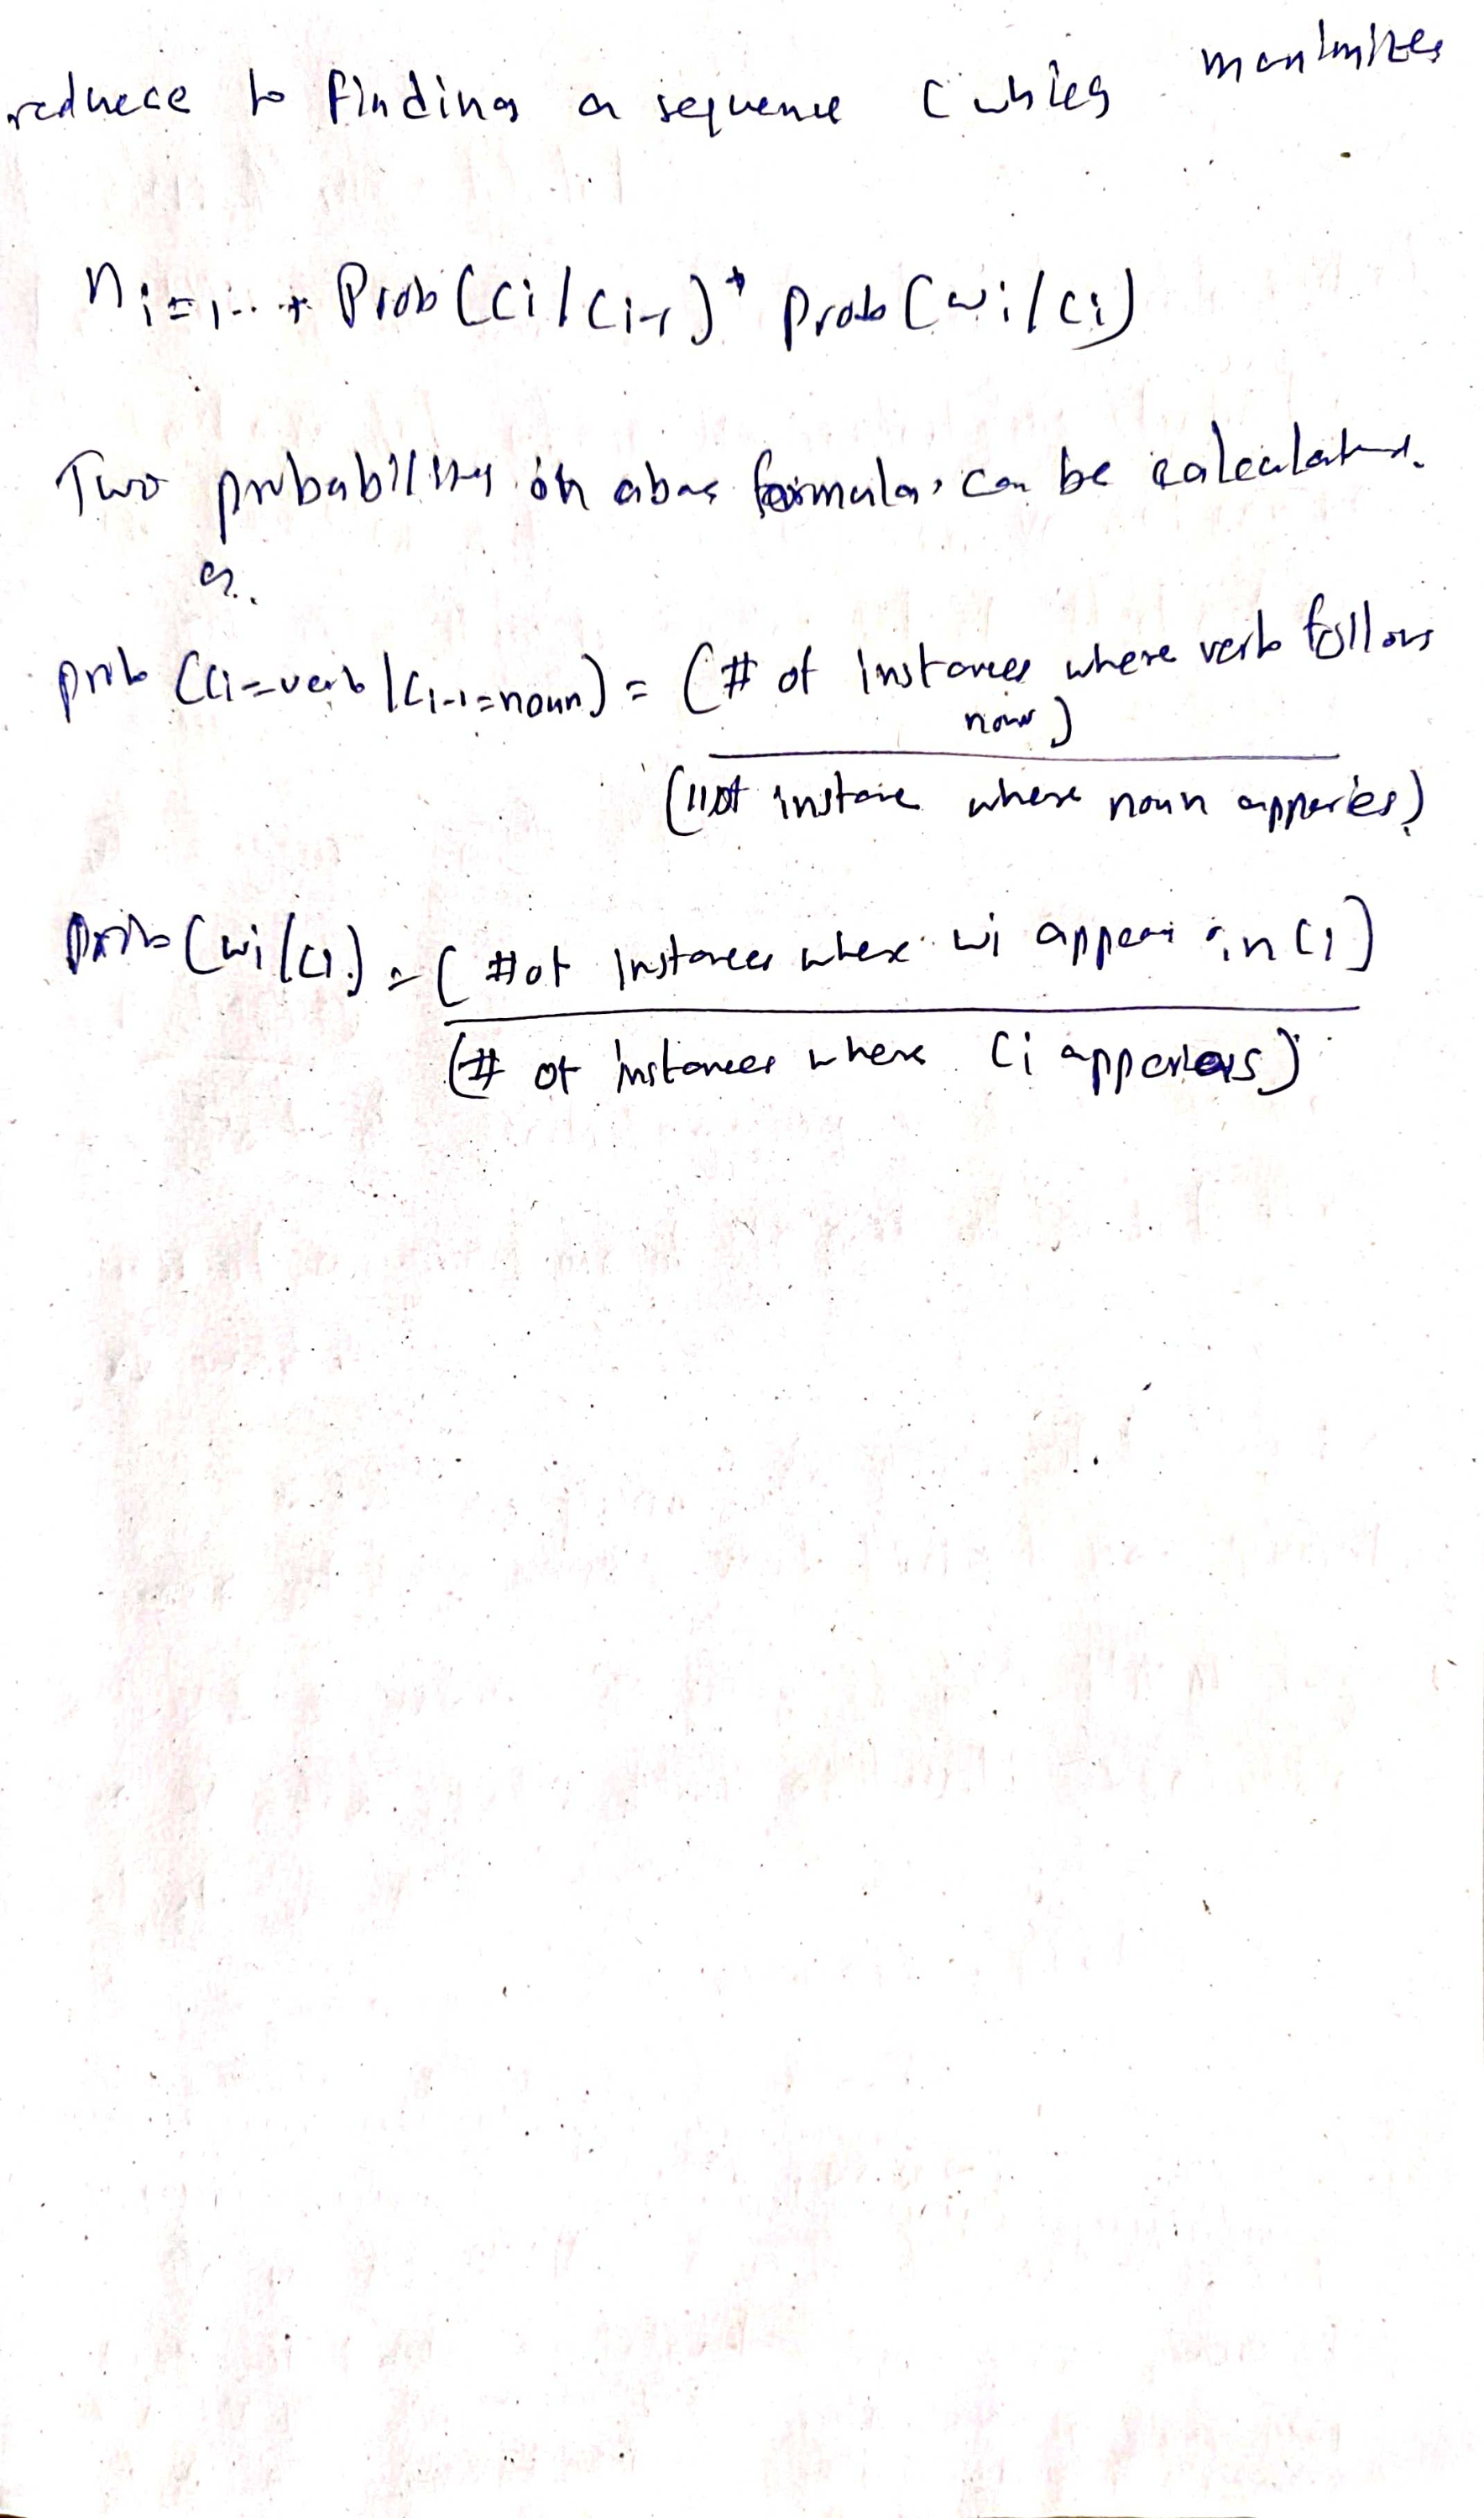